# Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [1]:
# Your code here - remember to use markdown cells for comments as well!
import pandas as pd
import numpy as np
from scipy.stats.mstats import mode
import seaborn as sns
import os
from glob import glob
import sqlite3
import matplotlib.pyplot as plt
%matplotlib inline 

sns.set_style('darkgrid')
sns.set_context('notebook')

In [2]:
csv_files = glob("./zippedData/*.csv.gz")
csv_files

['./zippedData\\bom.movie_gross.csv.gz',
 './zippedData\\imdb.name.basics.csv.gz',
 './zippedData\\imdb.title.akas.csv.gz',
 './zippedData\\imdb.title.basics.csv.gz',
 './zippedData\\imdb.title.crew.csv.gz',
 './zippedData\\imdb.title.principals.csv.gz',
 './zippedData\\imdb.title.ratings.csv.gz',
 './zippedData\\tmdb.movies.csv.gz',
 './zippedData\\tn.movie_budgets.csv.gz']

In [3]:
type(csv_files)

list

In [4]:
d = dict()
for file in csv_files:
    d[file] = pd.read_csv(file)

In [5]:
d.keys()

dict_keys(['./zippedData\\bom.movie_gross.csv.gz', './zippedData\\imdb.name.basics.csv.gz', './zippedData\\imdb.title.akas.csv.gz', './zippedData\\imdb.title.basics.csv.gz', './zippedData\\imdb.title.crew.csv.gz', './zippedData\\imdb.title.principals.csv.gz', './zippedData\\imdb.title.ratings.csv.gz', './zippedData\\tmdb.movies.csv.gz', './zippedData\\tn.movie_budgets.csv.gz'])

In [6]:
d.values()

dict_values([                                            title      studio  domestic_gross  \
0                                     Toy Story 3          BV     415000000.0   
1                      Alice in Wonderland (2010)          BV     334200000.0   
2     Harry Potter and the Deathly Hallows Part 1          WB     296000000.0   
3                                       Inception          WB     292600000.0   
4                             Shrek Forever After        P/DW     238700000.0   
...                                           ...         ...             ...   
3382                                    The Quake       Magn.          6200.0   
3383                  Edward II (2018 re-release)          FM          4800.0   
3384                                     El Pacto        Sony          2500.0   
3385                                     The Swan  Synergetic          2400.0   
3386                            An Actor Prepares       Grav.          1700.0   

     foreign_g

In [7]:
d['./zippedData\\imdb.title.crew.csv.gz'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 3 columns):
tconst       146144 non-null object
directors    140417 non-null object
writers      110261 non-null object
dtypes: object(3)
memory usage: 3.3+ MB


In [8]:
csv_files_dict = dict()
for filename in csv_files:
    filename_cleaned = os.path.basename(filename).replace(".csv","").replace(".","_") # cleaning file names
    filename_df = pd.read_csv(filename, index_col=None)
    csv_files_dict[filename_cleaned] = filename_df

In [9]:
csv_files_dict.keys()

dict_keys(['bom_movie_gross_gz', 'imdb_name_basics_gz', 'imdb_title_akas_gz', 'imdb_title_basics_gz', 'imdb_title_crew_gz', 'imdb_title_principals_gz', 'imdb_title_ratings_gz', 'tmdb_movies_gz', 'tn_movie_budgets_gz'])

In [10]:
csv_files_dict['imdb_title_crew_gz'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 3 columns):
tconst       146144 non-null object
directors    140417 non-null object
writers      110261 non-null object
dtypes: object(3)
memory usage: 3.3+ MB


In [11]:
imdb_title_crew_df = csv_files_dict['imdb_title_crew_gz']
imdb_title_crew_df.head()

,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,NaN,"nm0175726,nm1802864"
2,tt0462036,nm1940585,nm1940585
3,tt0835418,nm0151540,"nm0310087,nm0841532"
4,tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943


In [12]:
conn = sqlite3.Connection('movies_db.sqlite')

In [13]:
def create_sql_table_from_df(df, name, conn):
    try:
        df.to_sql(name, conn)
        print(f"Created table {name}")
    
    except Exception as e:
        print(f"Couldn't make table {name}")
        print(e)

In [14]:
for name, table in csv_files_dict.items():
    create_sql_table_from_df(table, name, conn)

Couldn't make table bom_movie_gross_gz
Table 'bom_movie_gross_gz' already exists.
Couldn't make table imdb_name_basics_gz
Table 'imdb_name_basics_gz' already exists.
Couldn't make table imdb_title_akas_gz
Table 'imdb_title_akas_gz' already exists.
Couldn't make table imdb_title_basics_gz
Table 'imdb_title_basics_gz' already exists.
Couldn't make table imdb_title_crew_gz
Table 'imdb_title_crew_gz' already exists.
Couldn't make table imdb_title_principals_gz
Table 'imdb_title_principals_gz' already exists.
Couldn't make table imdb_title_ratings_gz
Table 'imdb_title_ratings_gz' already exists.
Couldn't make table tmdb_movies_gz
Table 'tmdb_movies_gz' already exists.
Couldn't make table tn_movie_budgets_gz
Table 'tn_movie_budgets_gz' already exists.


C:\Users\renjm\Anaconda3\envs\learn-env\lib\site-packages\pandas\core\generic.py:2712: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  method=method,


In [15]:
conn.execute("select name from sqlite_master where type='table';").fetchall()

[('bom_movie_gross_gz',),
 ('imdb_name_basics_gz',),
 ('imdb_title_akas_gz',),
 ('imdb_title_basics_gz',),
 ('imdb_title_crew_gz',),
 ('imdb_title_principals_gz',),
 ('imdb_title_ratings_gz',),
 ('tmdb_movies_gz',),
 ('tn_movie_budgets_gz',)]

In [16]:
for item in csv_files_dict.items():
    print("******** NEW DF **********")
    print(item[0])
    print(item[1].info())
    print("******** END DF **********")

******** NEW DF **********
bom_movie_gross_gz
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
title             3387 non-null object
studio            3382 non-null object
domestic_gross    3359 non-null float64
foreign_gross     2037 non-null object
year              3387 non-null int64
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB
None
******** END DF **********
******** NEW DF **********
imdb_name_basics_gz
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606648 entries, 0 to 606647
Data columns (total 6 columns):
nconst                606648 non-null object
primary_name          606648 non-null object
birth_year            82736 non-null float64
death_year            6783 non-null float64
primary_profession    555308 non-null object
known_for_titles      576444 non-null object
dtypes: float64(2), object(4)
memory usage: 27.8+ MB
None
******** END DF **********
******** NEW DF **********
imdb_title_akas_gz


# 1 
## Question 1: Waht are the top 5 grossing films?

In [17]:
movie_budget_df = csv_files_dict['tn_movie_budgets_gz']
type(movie_budget_df)

pandas.core.frame.DataFrame

In [18]:
movie_budget_df.shape

(5782, 6)

In [19]:
movie_budget_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [20]:
movie_budget_df[movie_budget_df.movie == 'Avatar']

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"


In [21]:
movie_budget_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
id                   5782 non-null int64
release_date         5782 non-null object
movie                5782 non-null object
production_budget    5782 non-null object
domestic_gross       5782 non-null object
worldwide_gross      5782 non-null object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [22]:
movie_budget_df.isna().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

## 1.1 Data Cleaning

### 1.1.1 Dealing with datatypes

In [23]:
### change dtype of columns
# we want to change the types of 3 columns. Good idea to write a function for this

def convert_amt_to_int(df, col):
    df[col] = df[col].str.replace("$","").str.replace(",","").astype('float64')
    return df

In [24]:
# making a list of all the cols where we want to change the dtype

money_cols = ['production_budget', 'domestic_gross', 'worldwide_gross']

for col in money_cols:
    movie_budget_df = convert_amt_to_int(movie_budget_df,col)

In [25]:
movie_budget_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
id                   5782 non-null int64
release_date         5782 non-null object
movie                5782 non-null object
production_budget    5782 non-null float64
domestic_gross       5782 non-null float64
worldwide_gross      5782 non-null float64
dtypes: float64(3), int64(1), object(2)
memory usage: 271.2+ KB


In [26]:
movie_budget_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09


In [27]:
movie_budget_df.isna().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

### 1.1.2 Changing the value counts

In [28]:
# looking at the most occuring values to see if there are any weird values
for col in movie_budget_df:
    print(f"Viewing values in col: {col}")
    print(f"Top 5 values:\n{movie_budget_df[col].value_counts(normalize=True)}")
    print("***** ***** ***** ***** *****")

Viewing values in col: id
Top 5 values:
4      0.010031
53     0.010031
61     0.010031
65     0.010031
69     0.010031
         ...   
85     0.009858
100    0.009858
96     0.009858
92     0.009858
97     0.009858
Name: id, Length: 100, dtype: float64
***** ***** ***** ***** *****
Viewing values in col: release_date
Top 5 values:
Dec 31, 2014    0.004151
Dec 31, 2015    0.003978
Dec 31, 2010    0.002594
Dec 31, 2008    0.002421
Dec 31, 2013    0.002248
                  ...   
Aug 27, 1982    0.000173
Sep 1, 1938     0.000173
Aug 26, 1948    0.000173
Dec 31, 1989    0.000173
Apr 23, 2009    0.000173
Name: release_date, Length: 2418, dtype: float64
***** ***** ***** ***** *****
Viewing values in col: movie
Top 5 values:
King Kong              0.000519
Halloween              0.000519
Home                   0.000519
The Karate Kid         0.000346
Death at a Funeral     0.000346
                         ...   
Arctic Dogs            0.000173
The Four Seasons       0.000173
Unhinged     

Now that we know our dataframe has clean data, we can start working on the logic needed to get the top 5 grossing movies. As we have the production budget availables, we can create a new column which will have the profits the movie has made.

In [29]:
# getting required difference column
movie_budget_df['budget_gross_diff'] = movie_budget_df.worldwide_gross - movie_budget_df.production_budget
movie_budget_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,budget_gross_diff
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,2.351345e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,6.350639e+08
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,-2.002376e+08
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,1.072414e+09
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,9.997217e+08


In [30]:
# getting the top 5 most grossing films 
movie_budget_df.sort_values(by='budget_gross_diff', ascending=False).head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,budget_gross_diff
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,2.351345e+09
42,43,"Dec 19, 1997",Titanic,200000000.0,659363944.0,2.208208e+09,2.008208e+09
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,1.748134e+09
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000.0,936662225.0,2.053311e+09,1.747311e+09
33,34,"Jun 12, 2015",Jurassic World,215000000.0,652270625.0,1.648855e+09,1.433855e+09


### 1.1.3 Getting the top 50 grossing films

In [31]:
# deciding to go into more details with 50 films
movie_budget_df_top50 = movie_budget_df[:50]

## 1.2 Bringing in a dataframe with genre details

Now that we have the movies, having some more information about the movies like their genres will give us some advanced insights.

In [32]:
# title basics df will have all the required info
imdb_title_basics_df = csv_files_dict['imdb_title_basics_gz']
imdb_title_basics_df.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [33]:
# using merge and using a left join. As col names are different, using left_on and right_on options 
movie_details_df = pd.merge(movie_budget_df_top50, imdb_title_basics_df, left_on=['movie'], 
                            right_on=['primary_title'],
                            how='left')

In [34]:
movie_details_df.shape

(55, 13)

In [35]:
movie_details_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55 entries, 0 to 54
Data columns (total 13 columns):
id                   55 non-null int64
release_date         55 non-null object
movie                55 non-null object
production_budget    55 non-null float64
domestic_gross       55 non-null float64
worldwide_gross      55 non-null float64
budget_gross_diff    55 non-null float64
tconst               41 non-null object
primary_title        41 non-null object
original_title       41 non-null object
start_year           41 non-null float64
runtime_minutes      38 non-null float64
genres               40 non-null object
dtypes: float64(6), int64(1), object(6)
memory usage: 6.0+ KB


In [36]:
movie_details_df.dropna(inplace=True)

movie_details_df.shape

In [37]:
movie_details_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,budget_gross_diff,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,2.351345e+09,tt1775309,Avatar,Abatâ,2011.0,93.0,Horror
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,6.350639e+08,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011.0,136.0,"Action,Adventure,Fantasy"
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,-2.002376e+08,tt6565702,Dark Phoenix,Dark Phoenix,2019.0,113.0,"Action,Adventure,Sci-Fi"
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,1.072414e+09,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015.0,141.0,"Action,Adventure,Sci-Fi"
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,1.748134e+09,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018.0,149.0,"Action,Adventure,Sci-Fi"


In [38]:
# genre is a list of upto 3 genres, splitting it to get the individual genres

movie_details_df['genres'] = movie_details_df['genres'].apply(lambda x:x.split(',') if x else x)
movie_details_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,budget_gross_diff,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,2.351345e+09,tt1775309,Avatar,Abatâ,2011.0,93.0,[Horror]
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,6.350639e+08,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011.0,136.0,"[Action, Adventure, Fantasy]"
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,-2.002376e+08,tt6565702,Dark Phoenix,Dark Phoenix,2019.0,113.0,"[Action, Adventure, Sci-Fi]"
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,1.072414e+09,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015.0,141.0,"[Action, Adventure, Sci-Fi]"
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,1.748134e+09,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018.0,149.0,"[Action, Adventure, Sci-Fi]"


In [39]:
# making a set of all genres we have, set doesn't allow duplicate values

all_genres = set()
for genre in movie_details_df['genres']:
    if genre:
        all_genres.update(genre)
        
all_genres

{'Action',
 'Adventure',
 'Animation',
 'Comedy',
 'Crime',
 'Drama',
 'Family',
 'Fantasy',
 'History',
 'Horror',
 'Sci-Fi',
 'Thriller',
 'Western'}

In [40]:
# adding cols with zeros for all the genres we have. Will modify genre to 1 if the file is of that genre.

for genre in all_genres:
    movie_details_df[genre] = np.zeros(shape=movie_details_df.shape[0])
    
movie_details_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,budget_gross_diff,tconst,primary_title,original_title,...,Comedy,Drama,History,Sci-Fi,Fantasy,Thriller,Adventure,Western,Crime,Animation
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,2.351345e+09,tt1775309,Avatar,Abatâ,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,6.350639e+08,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,-2.002376e+08,tt6565702,Dark Phoenix,Dark Phoenix,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,1.072414e+09,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,1.748134e+09,tt4154756,Avengers: Infinity War,Avengers: Infinity War,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [41]:
# setting the genre to be 1 if the file is of that genre

for index, row in movie_details_df.iterrows():
    if row['genres']:
        for genre in row['genres']:
            movie_details_df.loc[index,genre] = 1
            
movie_details_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,budget_gross_diff,tconst,primary_title,original_title,...,Comedy,Drama,History,Sci-Fi,Fantasy,Thriller,Adventure,Western,Crime,Animation
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,2.351345e+09,tt1775309,Avatar,Abatâ,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,6.350639e+08,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,-2.002376e+08,tt6565702,Dark Phoenix,Dark Phoenix,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,1.072414e+09,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,1.748134e+09,tt4154756,Avengers: Infinity War,Avengers: Infinity War,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [42]:
movie_details_df_modified = movie_details_df.drop(columns='genres')

In [43]:
# checking the counts for all different genres

for col in movie_details_df_modified:
    print(f"Viewing values in col: {col}")
    print(f"Top 5 values:\n{movie_details_df_modified[col].value_counts()}")

Viewing values in col: id
Top 5 values:
39    4
48    1
12    1
19    1
18    1
17    1
15    1
14    1
13    1
11    1
22    1
10    1
9     1
7     1
4     1
3     1
2     1
21    1
23    1
47    1
25    1
27    1
29    1
31    1
32    1
33    1
34    1
35    1
37    1
42    1
43    1
44    1
45    1
46    1
1     1
Name: id, dtype: int64
Viewing values in col: release_date
Top 5 values:
May 14, 2010    4
Dec 19, 1997    1
Mar 25, 2016    1
Dec 18, 2009    1
Dec 13, 2013    1
May 4, 2012     1
May 26, 2017    1
Apr 14, 2017    1
Jun 21, 2017    1
Mar 9, 2012     1
Jul 20, 2012    1
Dec 14, 2012    1
May 1, 2015     1
Jun 15, 2018    1
Nov 17, 2017    1
Jun 18, 2010    1
Jul 2, 2013     1
Jun 12, 2015    1
Jun 7, 2019     1
May 25, 2018    1
May 20, 2011    1
Nov 24, 2010    1
Jun 14, 2013    1
Dec 16, 2016    1
May 18, 2012    1
Jul 3, 2012     1
May 6, 2016     1
May 3, 2013     1
Jun 17, 2016    1
May 25, 2012    1
Feb 16, 2018    1
Dec 17, 2014    1
Nov 6, 2015     1
Jun 27, 2014 

In [44]:
# making a list of all genres

cols = list(movie_details_df.columns)
genres_cols = cols[11:]

In [45]:
# getting a dict with genre counts

genre_count = dict()
for col in genres_cols:
    count = np.sum(movie_details_df[col] == 1).sum()
    genre_count[col] = count
    
genre_count

{'runtime_minutes': 0,
 'genres': 0,
 'Horror': 1,
 'Action': 30,
 'Family': 2,
 'Comedy': 4,
 'Drama': 2,
 'History': 1,
 'Sci-Fi': 15,
 'Fantasy': 8,
 'Thriller': 4,
 'Adventure': 33,
 'Western': 1,
 'Crime': 1,
 'Animation': 4}

In [46]:
keys = list(genre_count.keys())
values = list(genre_count.values())

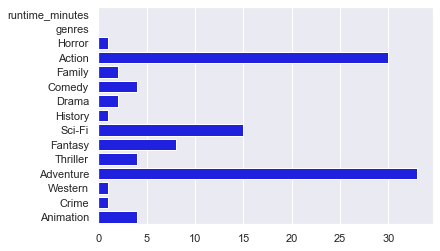

In [47]:
sns.barplot(y=keys, x=values, color='blue')

# 2 
## Question 2: What genres of 5 movies is each director best known for?

# 3
## Question 3:  Is most popular genre correlated with director's profession?